In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

## Annotations visualization tamplet.
anns = coco.loadAnns(annIds)    
coco.showAnns(anns)

In [2]:
dataDir=os.path.expanduser('~/datasets/coco')
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
# get category ids that satisfy given filter conditions
# load category with given ids
nms=[cat['name'] for cat in cats]
print(f'Number of categories: {len(nms)}')
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

Number of categories: 80
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor outdoor appliance animal furniture kitchen person electronic food accessory sports vehicle


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard'])
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# return a dict with img info

In [7]:
imgIds = coco.getImgIds(catIds=catIds);
img2 = coco.loadImgs(imgIds[0])
img2

[{'license': 2,
  'file_name': '000000549220.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000549220.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-18 11:01:23',
  'flickr_url': 'http://farm4.staticflickr.com/3145/2419498650_fdfe34eb93_z.jpg',
  'id': 549220}]

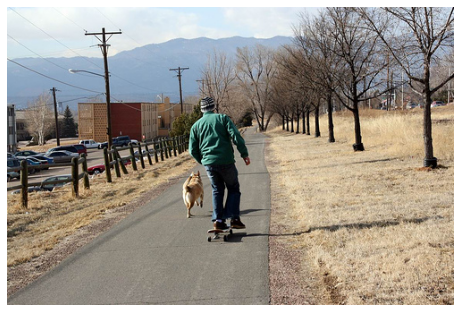

In [8]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()
# Question: Load from web??

[10673, 638724, 2162813]
sheep
cup
bicycle


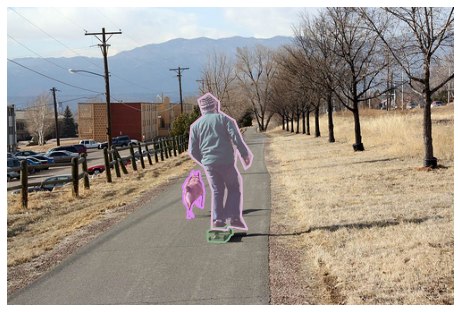

In [43]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

for idx, ann in enumerate(anns):
    className = cats[ann['category_id']]['name']
    print(className)

# print(anns)
# print(type(anns))
# # anns are segementation mask
# # get -load - show

(334, 500)


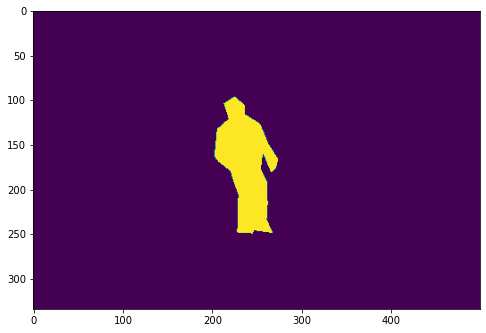

In [25]:
# convert anns to binary mask: m*n in {0,1}
bimask = coco.annToMask(anns[2])
print(bimask.shape)
plt.imshow(bimask)
plt.show()

In [9]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


[{'segmentation': [[228.43, 247.9, 229.63, 206.62, 224.24, 191.07, 220.65, 179.7, 207.49, 169.53, 202.71, 163.55, 205.7, 133.04, 218.86, 121.68, 213.47, 104.33, 225.44, 96.55, 236.8, 106.12, 236.8, 116.29, 254.15, 127.06, 263.72, 150.39, 274.49, 166.54, 271.5, 177.31, 266.12, 181.5, 257.14, 159.96, 254.75, 177.91, 261.93, 192.27, 262.53, 216.79, 261.33, 234.14, 268.51, 249.1, 247.57, 246.11, 245.78, 249.69, 229.03, 248.5]], 'num_keypoints': 12, 'area': 5999.5445, 'iscrowd': 0, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 212, 135, 2, 241, 125, 2, 209, 162, 2, 257, 146, 2, 218, 172, 2, 267, 167, 2, 225, 177, 2, 247, 176, 2, 235, 203, 2, 254, 204, 2, 236, 240, 2, 254, 238, 2], 'image_id': 324158, 'bbox': [202.71, 96.55, 71.78, 153.14], 'category_id': 1, 'id': 2162813}]


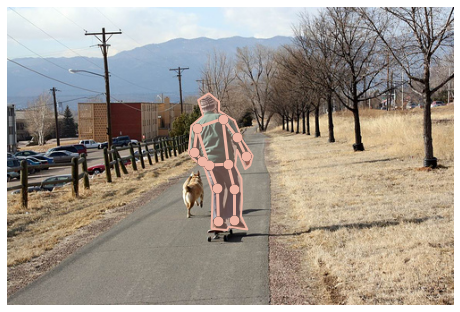

In [10]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
print(anns)
coco_kps.showAnns(anns)
# 给出比较粗糙的segmention和关键点

In [11]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


[{'image_id': 324158, 'id': 310079, 'caption': 'A man is skate boarding down a path and a dog is running by his side.'}, {'image_id': 324158, 'id': 311105, 'caption': 'A man on a skateboard with a dog outside. '}, {'image_id': 324158, 'id': 311588, 'caption': 'A person riding a skate board with a dog following beside.'}, {'image_id': 324158, 'id': 312677, 'caption': 'This man is riding a skateboard behind a dog.'}, {'image_id': 324158, 'id': 312860, 'caption': 'A man walking his dog on a quiet country road.'}]
A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


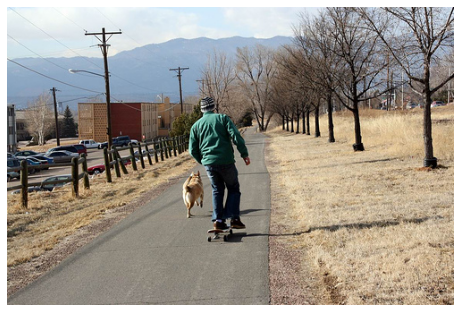

In [27]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
print(anns)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [14]:
import pycocotools.mask as mask_utils

In [26]:

def seg_to_mask(seg, width=1.0, height=1.0):
    """
    Tiny utility for decoding segmentation masks using the pycocotools API.
    """
    if type(seg) == list:
        rles = mask_utils.frPyObjects(seg, height, width)
        rle = mask_utils.merge(rles)
    elif type(seg['counts']) == list:
        rle = mask_utils.frPyObjects(seg, height, width)
    else:
        rle = seg
    return mask_utils.decode(rle)

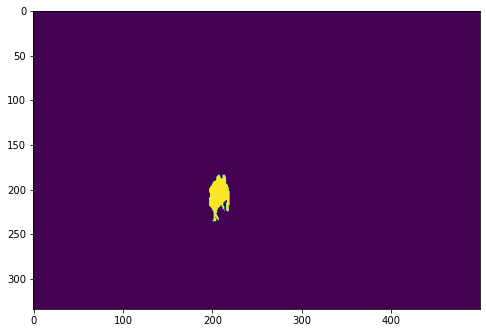

In [36]:
HH,WW,C = I.shape
obj_dog = anns[0]
mask = seg_to_mask(obj_dog['segmentation'], WW, HH)
plt.imshow(mask)
plt.show()

0
1
2


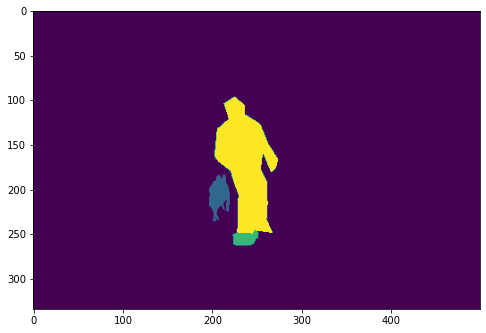

In [47]:
## Generate semantic segmentation and visualize it


def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

mask = np.zeros((HH, WW))
for i in range(len(anns)):
    # className = getClassName(anns[i]['category_id'], cats)
    pixel_value = i+1
    print(i)
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
plt.imshow(mask)